<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<p> متادیتا، داده‌هایی در مورد API است که نحوه اجرای آن را تغییر نمی‌دهد، بلکه اطلاعات بیشتری در مورد API ارائه می‌دهد که سایر ابزارها و امکانات بتوانند به آن دسترسی داشته باشند. برای مثال، در فصل ۵ کتاب به استفاده از متادیتا با متد <code>WithName()</code> اشاره شده که برای نام‌گذاری نقاط انتهایی (Endpoints) به کار می‌رود. این نام‌گذاری نحوه اجرای API را تغییر نمی‌دهد، اما اطلاعاتی را فراهم می‌کند که می‌تواند برای ویژگی‌های دیگر مانند <code>LinkGenerator</code> استفاده شود.</p>

<p>در حال حاضر، سه دسته کلی از متادیتا را می‌توانید به Minimal APIها اضافه کنید:</p>

<ol><li><p><strong>متادیتای مسیریابی (Routing metadata):</strong><br>این نوع متادیتا شامل روش‌هایی مانند <code>WithName()</code> است که یک نام منحصر به فرد به یک Endpoint اختصاص می‌دهد. این نام برای تولید URLها استفاده می‌شود و به شما اجازه می‌دهد تا در برنامه به این Endpoint به راحتی ارجاع دهید.</p></li><li><p><strong>متادیتا برای سایر Middlewareها:</strong><br>برخی Middlewareها (واسط‌ها) قابلیت سفارشی‌سازی برای هر درخواست را دارند. برای این کار، متادیتا به Endpointها اضافه می‌شود. زمانی که Middleware اجرا می‌شود، متادیتای Endpoint مورد نظر را بررسی کرده و بر اساس آن عمل می‌کند. مثال‌هایی از این نوع متادیتا شامل مواردی مثل مجوزدهی (Authorization)، فیلتر کردن بر اساس نام میزبان (Hostname Filtering)، و کش خروجی (Output Caching) است.</p></li><li><p><strong>متادیتای OpenAPI:</strong><br>تولید مستندات OpenAPI بر اساس متادیتایی که توسط Endpointها فراهم می‌شود، انجام می‌گیرد. این متادیتا کنترل می‌کند که رابط کاربری در Swagger UI چگونه نمایش داده شود و از چه اطلاعاتی برای نمایش ساختار API استفاده شود.</p></li></ol>

</div>

In [ ]:
using System.Collections.Concurrent;

WebApplicationBuilder builder = WebApplication.CreateBuilder(args);

builder.Services.AddEndpointsApiExplorer();

builder.Services.AddSwaggerGen();

WebApplication app = builder.Build();

var _fruit = new ConcurrentDictionary<string, Fruit>();

app.UseSwagger();

app.UseSwaggerUI();

app.MapGet("/fruit/{id}", (string id) =>
    _fruit.TryGetValue(id, out var fruit)
        ? TypedResults.Ok(fruit)
        : Results.Problem(statusCode: 404))
    .WithTags("fruit")
    .Produces<Fruit>() 
    .ProducesProblem(404);

app.MapPost("/fruit/{id}", (string id, Fruit fruit) =>
        _fruit.TryAdd(id, fruit)
        ? TypedResults.Created($"/fruit/{id}", fruit)
        : Results.ValidationProblem(new Dictionary<string, string[]>
          {
              { "id", new[] { "A fruit with this id already exists" } }
          }))
    .WithTags("fruit")
    .Produces<Fruit>(201) 
    .ProducesValidationProblem();

app.Run();
record Fruit(string Name, int Stock);

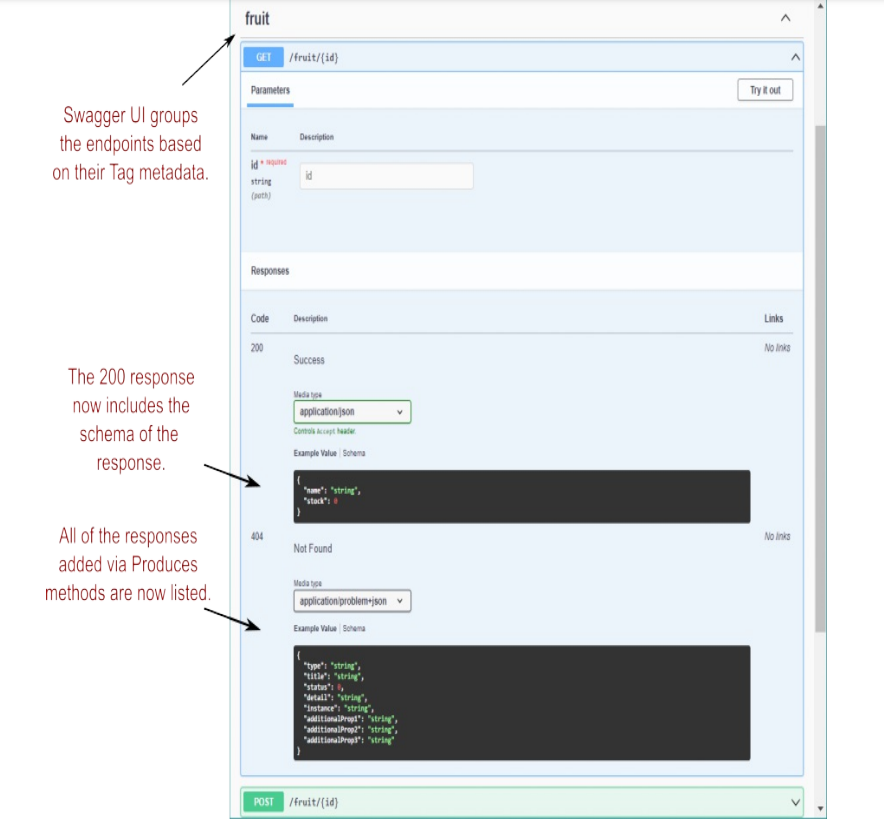